In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
import scipy
warnings.filterwarnings('ignore')


In [41]:
df = pd.read_csv("mcdonaldata.csv")
df.head()

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular


In [42]:
# Removing the unnamed column

df = df.iloc[: ,1 :]
df.head()

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular


In [43]:
## EXPLORATORY DATA ANALYSIS


#checking column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        141 non-null    object 
 1   servesize   141 non-null    object 
 2   calories    141 non-null    object 
 3   protien     141 non-null    float64
 4   totalfat    141 non-null    float64
 5   satfat      141 non-null    float64
 6   transfat    141 non-null    float64
 7   cholestrol  141 non-null    float64
 8   carbs       141 non-null    float64
 9   sugar       141 non-null    float64
 10  addedsugar  141 non-null    float64
 11  sodium      141 non-null    float64
 12  menu        141 non-null    object 
dtypes: float64(9), object(4)
memory usage: 14.4+ KB


In [44]:
# Converting servesize and calories data type.



df['servesize'] = df['servesize'].astype('float64')
df['calories'] = df['calories'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        141 non-null    object 
 1   servesize   141 non-null    float64
 2   calories    141 non-null    float64
 3   protien     141 non-null    float64
 4   totalfat    141 non-null    float64
 5   satfat      141 non-null    float64
 6   transfat    141 non-null    float64
 7   cholestrol  141 non-null    float64
 8   carbs       141 non-null    float64
 9   sugar       141 non-null    float64
 10  addedsugar  141 non-null    float64
 11  sodium      141 non-null    float64
 12  menu        141 non-null    object 
dtypes: float64(11), object(2)
memory usage: 14.4+ KB


In [46]:
# checking for null values

df.isnull().sum()

# no null values are observed

item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

## Visualizing the size of different categories

ex_level = df['menu'].value_counts()  



In [53]:
# visualizing the sizes of different categories
ex_level = df['menu'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Menu Category')
fig.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'regular'),
  Text(1, 0, 'breakfast'),
  Text(2, 0, 'mccafe'),
  Text(3, 0, 'dessert'),
  Text(4, 0, 'gourmet'),
  Text(5, 0, 'beverage'),
  Text(6, 0, 'condiments')])

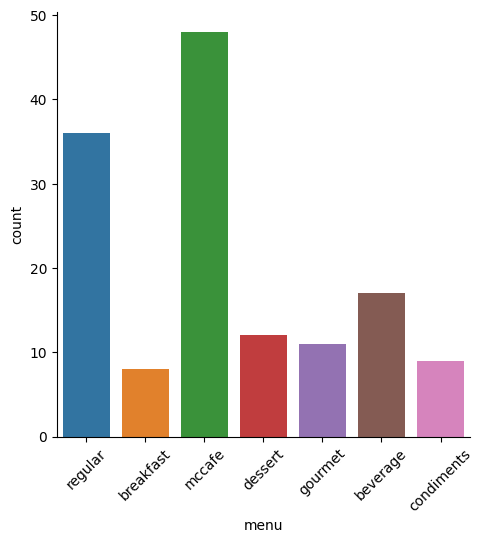

In [59]:
sns.catplot(x='menu', kind ='count' ,data =df)

# rotating labels for better readability

plt.xticks(rotation = 45)

In [63]:
df.loc[df['menu'] == 'mccafe']

,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
44,Espresso,26.5,12.87,0.52,0.03,0.03,0.03,0.270,2.55,0.13,0.00,0.32,mccafe
45,Espresso Machiato,76.5,44.98,2.09,2.02,1.49,0.08,6.270,4.87,2.50,0.00,26.05,mccafe
46,Americano (S),276.5,12.87,0.52,0.03,0.03,0.03,0.270,2.55,0.13,0.00,0.32,mccafe
47,Americano (R),347.5,23.07,0.94,0.05,0.05,0.05,0.480,4.57,0.24,0.00,0.57,mccafe
48,Americano (L),455.0,26.71,1.09,0.06,0.06,0.06,0.550,5.30,0.28,0.00,0.65,mccafe
49,Cappuccino (S),201.5,125.25,6.02,7.01,5.15,0.20,21.270,11.02,8.40,0.00,90.39,mccafe
50,Cappuccino (R),297.5,183.61,8.79,10.02,7.37,0.30,30.480,16.67,12.05,0.00,129.24,mccafe
51,Cappuccino (L),355.0,219.36,10.51,12.03,8.85,0.36,36.550,19.81,14.45,0.00,155.06,mccafe
52,Latte (S),236.5,147.72,7.12,8.41,6.18,0.24,25.470,12.71,10.06,0.00,108.40,mccafe
53,Latte (R),307.5,190.03,9.10,10.42,7.67,0.31,31.680,17.15,12.52,0.00,134.39,mccafe


<h1> Mccafe has highest number of products but drinks in different sizes could be a reason for that. Regular menu has the highest unique food items</h1>


In [77]:
## visaulizing serving sizes


fig = px.box(y=df['servesize'], title='Serving sizes in gm/ml')
fig.show()

In [78]:
# visualizing calories


fig = px.box(y=df['calories'], title='Calories')
fig.show()

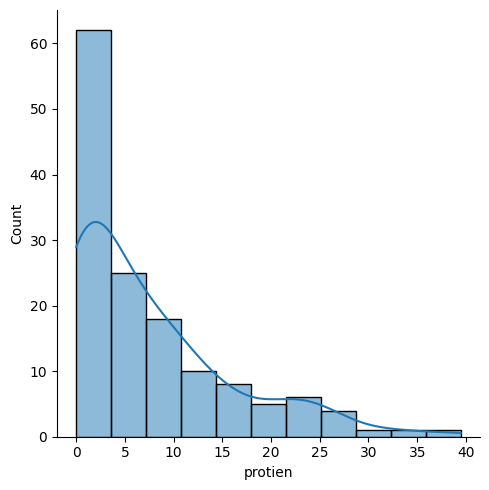

In [70]:
## visualizing amount of protein
sns.displot(df['protien'], kde=True)

<h1>The data is skewed in a way that represent most menu items are low in protein content</h1>




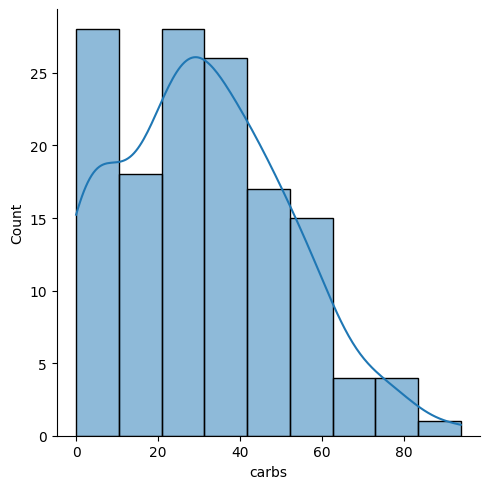

In [80]:
# visualising carbohydrate content

sns.displot(df['carbs'], kde=True)

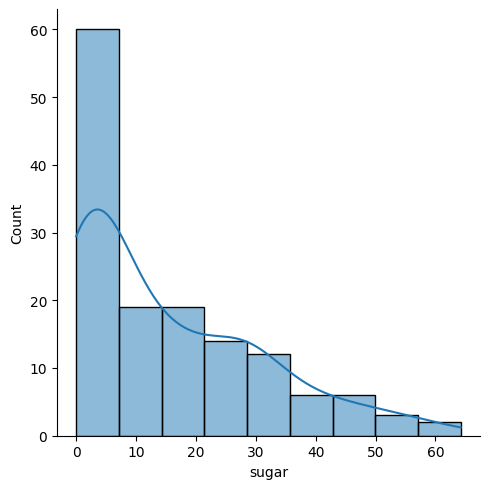

In [81]:
# visualizing sugar content

sns.displot(df['sugar'], kde=True)

<p1>Most item contain less than 10gm of sugar which clubbed with high amount of products in cafe and beverage menu can be reason for rise in carbohydrate graph at the start </p1>

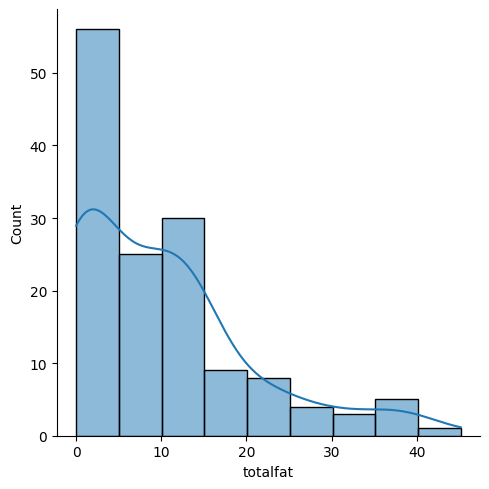

In [84]:
# visualizing fat content


sns.displot(df['totalfat'], kde=True)

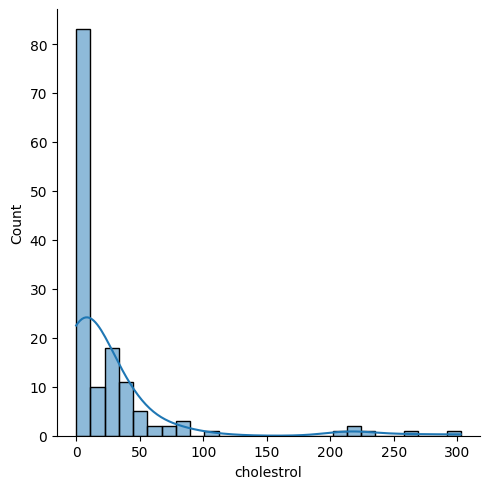

In [105]:

#visualizing cholestrol
#visualizing sodium content
sns.displot(df['cholestrol'], kde=True  )
plt.title()

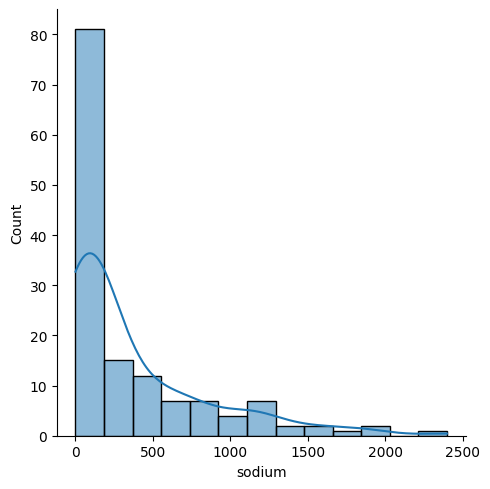

In [106]:
sns.displot(df['sodium'], kde=True)

<h2>Feature Creation</h2>

In [110]:
# Let use Total sugar and added sugar column to obtain and visualize natural sugar content

df['natsugar'] = df['sugar'] -df['addedsugar']
df['natsugar']

0       3.41
1       2.98
2       3.08
3       2.42
4       3.09
       ...  
136     0.69
137    10.86
138     0.54
139     2.54
140    16.83
Name: natsugar, Length: 141, dtype: float64

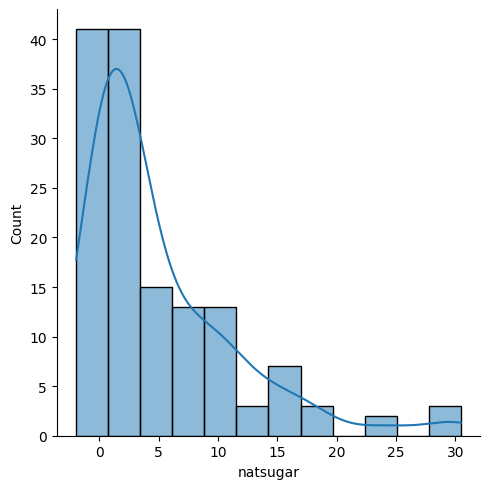

In [111]:
sns.displot(df['natsugar'], kde=True)

<h2>Mltivariate Analysis</h2>

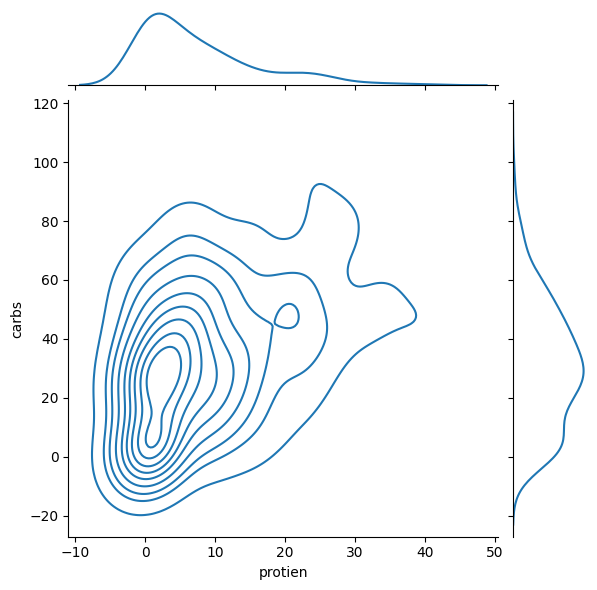

In [115]:
#visualizing relation between protein and carbs
sns.jointplot(x='protien', y='carbs', data=df, kind='kde')
